# Ames
___
## Imports / Reads

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../../Data/Ames/train.csv')
test_df = pd.read_csv('../../Data/Ames/test.csv')

___
## Cleaning

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.shape

(2051, 81)

In [5]:
columns = set(df.columns)
columns

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Bedroom AbvGr',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Fireplaces',
 'Foundation',
 'Full Bath',
 'Functional',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Heating',
 'Heating QC',
 'House Style',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Area',
 'Lot Config',
 'Lot Frontage',
 'Lot Shape',
 'Low Qual Fin SF',
 'MS SubClass',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Neighborhood',
 'Open Porch SF',
 'Overall Cond',
 'Overall

___
### Missing Data

In [6]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Electrical         0
Central Air        0
Heating QC         0
Sale Type          0
Id                 0
Length: 81, dtype: int64

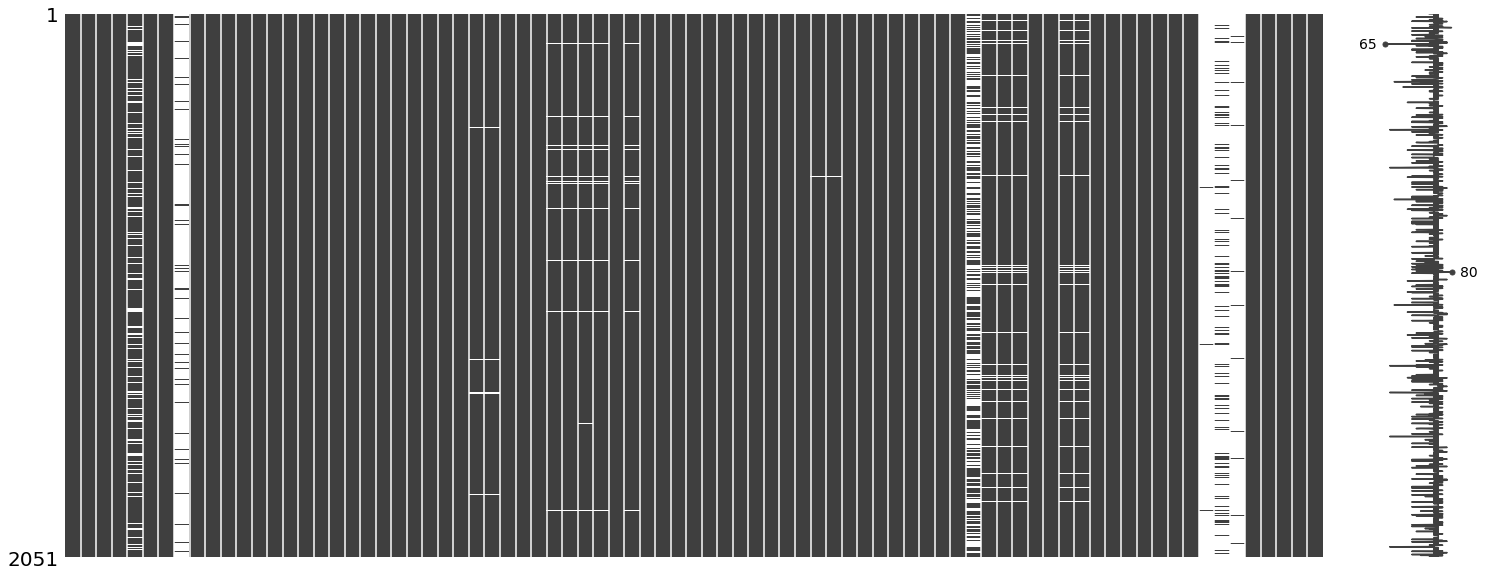

In [7]:
msno.matrix(df);

In [8]:
# lets get a list of how many missing values are in each column with missing values?
def null_check(cols):
    for col in cols:
        if df[col].isnull().sum() > 0:
            print(f'{col} has {df[col].isnull().sum()} null(s)')
            
null_check(columns)

Garage Type has 113 null(s)
Fireplace Qu has 1000 null(s)
Bsmt Cond has 55 null(s)
BsmtFin Type 1 has 55 null(s)
Garage Qual has 114 null(s)
Garage Area has 1 null(s)
Bsmt Exposure has 58 null(s)
Bsmt Half Bath has 2 null(s)
Bsmt Qual has 55 null(s)
Pool QC has 2042 null(s)
Bsmt Unf SF has 1 null(s)
Alley has 1911 null(s)
Garage Cars has 1 null(s)
Garage Finish has 114 null(s)
BsmtFin Type 2 has 56 null(s)
Total Bsmt SF has 1 null(s)
Fence has 1651 null(s)
Garage Yr Blt has 114 null(s)
BsmtFin SF 1 has 1 null(s)
Misc Feature has 1986 null(s)
Mas Vnr Type has 22 null(s)
BsmtFin SF 2 has 1 null(s)
Lot Frontage has 330 null(s)
Bsmt Full Bath has 2 null(s)
Garage Cond has 114 null(s)
Mas Vnr Area has 22 null(s)


Out of all the columns that have null values, the categorical columns can be imputed as 'None' because those houses do not have those features.

In [9]:
cat_cols = [
    'Alley',
    'Mas Vnr Type', 
    'Bsmt Qual', 
    'Bsmt Cond', 
    'Bsmt Exposure', 
    'BsmtFin Type 1', 
    'BsmtFin Type 2', 
    'Fireplace Qu', 
    'Garage Type', 
    'Garage Finish', 
    'Garage Qual', 
    'Garage Cond', 
    'Pool QC', 
    'Fence', 
    'Misc Feature'
]

[df[col].fillna('None', inplace=True) for col in cat_cols]
    
null_check(columns)

Garage Area has 1 null(s)
Bsmt Half Bath has 2 null(s)
Bsmt Unf SF has 1 null(s)
Garage Cars has 1 null(s)
Total Bsmt SF has 1 null(s)
Garage Yr Blt has 114 null(s)
BsmtFin SF 1 has 1 null(s)
BsmtFin SF 2 has 1 null(s)
Lot Frontage has 330 null(s)
Bsmt Full Bath has 2 null(s)
Mas Vnr Area has 22 null(s)


Next the nulls for the basement features can be set to 0 because those houses do not have basements

In [10]:
n_index = df.loc[df['Total Bsmt SF'].isnull()].index
df.loc[n_index, 'Total Bsmt SF'] = 0

n_index = df.loc[df['BsmtFin SF 1'].isnull()].index
df.loc[n_index, 'BsmtFin SF 1'] = 0

n_index = df.loc[df['BsmtFin SF 2'].isnull()].index
df.loc[n_index, 'BsmtFin SF 2'] = 0

n_index = df.loc[df['Bsmt Full Bath'].isnull()].index
df.loc[n_index, 'Bsmt Full Bath'] = 0

n_index = df.loc[df['Bsmt Unf SF'].isnull()].index
df.loc[n_index, 'Bsmt Unf SF'] = 0

n_index = df.loc[df['Bsmt Half Bath'].isnull()].index
df.loc[n_index, 'Bsmt Half Bath'] = 0

In [11]:
null_check(columns)

Garage Area has 1 null(s)
Garage Cars has 1 null(s)
Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)
Mas Vnr Area has 22 null(s)


Now to deal with the Garage Cars and Garage Area nulls. For these nulls I can impute them as the median for the type of garage in the same area. This won't be 100% accurate but it will be a good estimate

In [12]:
df.loc[df['Garage Cars'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [13]:
df.loc[df['Garage Cars'].isnull()]['Neighborhood']

1712    IDOTRR
Name: Neighborhood, dtype: object

In [14]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Cars'].median()

1.0

In [15]:
df.loc[1712, 'Garage Cars'] = 1

In [16]:
null_check(columns)

Garage Area has 1 null(s)
Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)
Mas Vnr Area has 22 null(s)


In [17]:
df.loc[df['Garage Area'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [18]:
df.loc[df['Garage Area'].isnull()]['Neighborhood']

1712    IDOTRR
Name: Neighborhood, dtype: object

In [19]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Area'].median()

338.0

In [20]:
df.loc[1712, 'Garage Area'] = 338

In [21]:
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)
Mas Vnr Area has 22 null(s)


In [22]:
n_index = df.loc[df['Mas Vnr Area'].isnull()].index
df.iloc[n_index]['Mas Vnr Type']

22      None
41      None
86      None
212     None
276     None
338     None
431     None
451     None
591     None
844     None
913     None
939     None
1025    None
1244    None
1306    None
1430    None
1434    None
1606    None
1699    None
1815    None
1820    None
1941    None
Name: Mas Vnr Type, dtype: object

Our Mas Vnr Area nulls can be set to 0 because none of them have Masonry Veneer

In [23]:
df.loc[n_index, 'Mas Vnr Area'] = 0
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)


In [24]:
# here we are setting all the nulls . for Garage Year Built to be 0 where there is no garage
n_index = df.loc[(df['Garage Yr Blt'].isnull()) & (df['Garage Type'] == 'None')].index
df.loc[n_index, 'Garage Yr Blt'] = 0

null_check(columns)

Garage Yr Blt has 1 null(s)
Lot Frontage has 330 null(s)


In [25]:
df.loc[df['Garage Yr Blt'].isnull()][['Garage Type', 'Neighborhood']]

,Garage Type,Neighborhood
1712,Detchd,IDOTRR


In [26]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Yr Blt'].median()

1942.0

again we're just going to impute this missing value as the median year for houses in that area with a detached garage

In [27]:
df.loc[1712, 'Garage Yr Blt'] = 1942
null_check(columns)

Lot Frontage has 330 null(s)


We're going to repeat the same process for Lot Frontage as well

In [28]:
# Filling in nulls for Lot Frontage

mini_df = df.loc[df['Lot Frontage'].isnull()][['Lot Area', 'Neighborhood', 'Lot Shape', 'Lot Config']]

while mini_df.shape[0] > 0:
    
    # get the values from the first entry in the list
    nhood = mini_df['Neighborhood'].values[0]
    lshape = mini_df['Lot Shape'].values[0]
    lconfig = mini_df['Lot Config'].values[0]
    
    # get the median Lot Frontage value for places matching the values of the first in the mini df
    n_index = df.loc[(df['Neighborhood'] == nhood) &
                 (df['Lot Shape'] == lshape) &
                 (df['Lot Config'] == lconfig)
                ].index
    
    lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
    
    # if our Lot Frontage median is nan we will broaden our scopes to get a numerical median
    if math.isnan(lfrontage_median):
        n_index = df.loc[(df['Neighborhood'] == nhood) &
                         (df['Lot Config'] == lconfig)
                        ].index
        lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
        
    # try a secondary method if our Lot Frontage median is still nan
    if math.isnan(lfrontage_median):
        n_index = df.loc[(df['Lot Shape'] == lshape) &
                         (df['Lot Config'] == lconfig)
                        ].index
        lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
        
    # impute nulls
    n_index = df.loc[(df['Lot Frontage'].isnull()) &
                 (df['Neighborhood'] == nhood) &
                 (df['Lot Shape'] == lshape) &
                 (df['Lot Config'] == lconfig)
                ].index
    df.loc[n_index, 'Lot Frontage'] = lfrontage_median
    
    # reset mini df
    mini_df = df.loc[df['Lot Frontage'].isnull()][['Lot Area', 'Neighborhood', 'Lot Shape', 'Lot Config']]

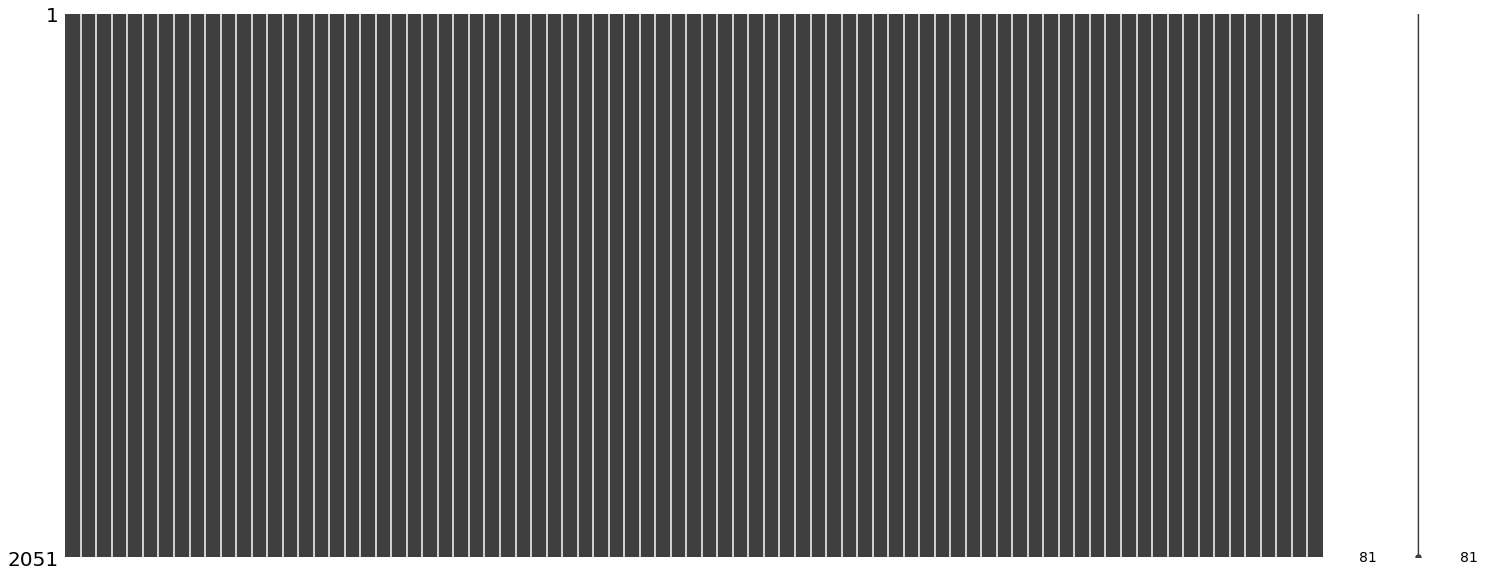

In [29]:
msno.matrix(df);

In [30]:
# save cleaned version
df.to_csv('../../Data/Ames/cleaned.csv', index=False)

___

## EDA

In [31]:
# make a function to check the correlation between a list of features and the target
def check_corr(df, features, target):
    
    # combine the features and the target into one list for the heatmap
    hm_list = features + [target]
    
    # plot the correlations between features and the target
    plt.figure(figsize=(2, len(features)/2))
    sns.heatmap(df[hm_list].corr()[[target]].sort_values(by=target, ascending=False),
                vmin=-1,
                vmax=1,
                cmap='coolwarm',
                annot=True
               );

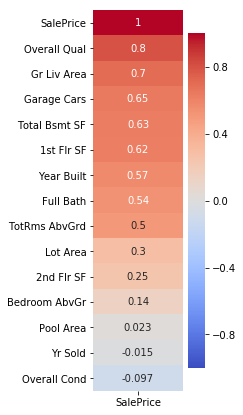

In [32]:
# make a list of initial predictors based off my initial thoughts on what would affect Sale Price
predictors = [
    'Overall Qual',
    'Overall Cond',
    'Gr Liv Area',
    'Lot Area',
    'Year Built',
    'Total Bsmt SF',
    '1st Flr SF',
    '2nd Flr SF',
    'Full Bath',
    'Bedroom AbvGr',
    'TotRms AbvGrd',
    'Garage Cars',
    'Pool Area',
    'Yr Sold'
]

check_corr(df, predictors, 'SalePrice')

The above heatmap shows some of our initial predictors are not linearly correlated with sale price. So, let's drop those from our list for the first model.

In [33]:
predictors = [
    'Overall Qual',
    'Gr Liv Area',
    'Year Built',
    'Total Bsmt SF',
    '1st Flr SF',
    'Full Bath',
    'TotRms AbvGrd',
    'Garage Cars'
]

In [35]:
# Let's make a function to build a linear model
def make_lr_model(df, features, target):
    # define our X and y (predictors and target)
    X = df[features]
    y = df[target]
    
    # train test split
    X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, random_state=42)
    
    # inst and fit
    mlr = LinearRegression()
    mlr.fit(X_train,y_train)
    
    # print out some info about our model
    
    print('--------------------------------------------------')
    print(f'R2 for training score: {mlr.score(X_train,y_train)}')
    print(f'R2 for holdout score: {mlr.score(X_holdout,y_holdout)}')
    print('--------------------------------------------------')
    print(f'Average Cross Val Score(cv=15): {cross_val_score(mlr, X_holdout, y_holdout, cv=15).mean()}')
    print('--------------------------------------------------')
    
    # refit the model to our entire data frame
    mlr = LinearRegression()
    mlr.fit(X,y)
    
    for i, name in enumerate(features):
        print(f'{name}\'s coefficient: {mlr.coef_[i]}')
    print('--------------------------------------------------')
    print(f'y intercept: {mlr.intercept_}')
    print('--------------------------------------------------')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, mlr.predict(X)))}') # root mean square error for entire dataset
    print('--------------------------------------------------')

In [36]:
make_lr_model(df, predictors, 'SalePrice')

--------------------------------------------------
R2 for training score: 0.7710136721475432
R2 for holdout score: 0.8287445679330392
--------------------------------------------------
Average Cross Val Score(cv=15): 0.8335607611043385
--------------------------------------------------
Overall Qual's coefficient: 21604.594742722165
Gr Liv Area's coefficient: 50.382855200727604
Year Built's coefficient: 352.9871573196483
Total Bsmt SF's coefficient: 18.44159621084735
1st Flr SF's coefficient: 17.83932770659868
Full Bath's coefficient: -6611.269700301858
TotRms AbvGrd's coefficient: -669.5369266046285
Garage Cars's coefficient: 13877.566435345996
--------------------------------------------------
y intercept: -772296.7731402058
--------------------------------------------------
RMSE: 36634.60417450773
--------------------------------------------------


Not a bad place to start. We should focus on feature engineering to help reduce our RMSE and improve our base model.